Arquivo carregado: SINASC_RO_2019_JAN.csv
Salvando gráficos em: C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens\2019-01
✅ Gráficos do mês JAN salvos com sucesso!

Arquivo carregado: SINASC_RO_2019_FEV.csv
Salvando gráficos em: C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens\2019-02
✅ Gráficos do mês FEV salvos com sucesso!

Arquivo carregado: SINASC_RO_2019_MAR.csv
Salvando gráficos em: C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens\2019-03
✅ Gráficos do mês MAR salvos com sucesso!

Arquivo carregado: SINASC_RO_2019_ABR.csv
Salvando gráficos em: C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens\2019-04
✅ Gráficos do mês ABR salvos com sucesso!

Arquivo carregado: SINASC_RO_2019_MAI.csv
Salvando gráficos em: C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens\2019-05


C:\Users\felip\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


✅ Gráficos do mês MAI salvos com sucesso!

Arquivo carregado: SINASC_RO_2019_JUN.csv
Salvando gráficos em: C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens\2019-06
✅ Gráficos do mês JUN salvos com sucesso!

Arquivo carregado: SINASC_RO_2019_JUL.csv
Salvando gráficos em: C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens\2019-07
✅ Gráficos do mês JUL salvos com sucesso!

Arquivo carregado: SINASC_RO_2019_AGO.csv
Salvando gráficos em: C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens\2019-08
✅ Gráficos do mês AGO salvos com sucesso!

Arquivo carregado: SINASC_RO_2019_SET.csv
Salvando gráficos em: C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens\2019-09
✅ Gráficos do mês SET salvos com sucesso!



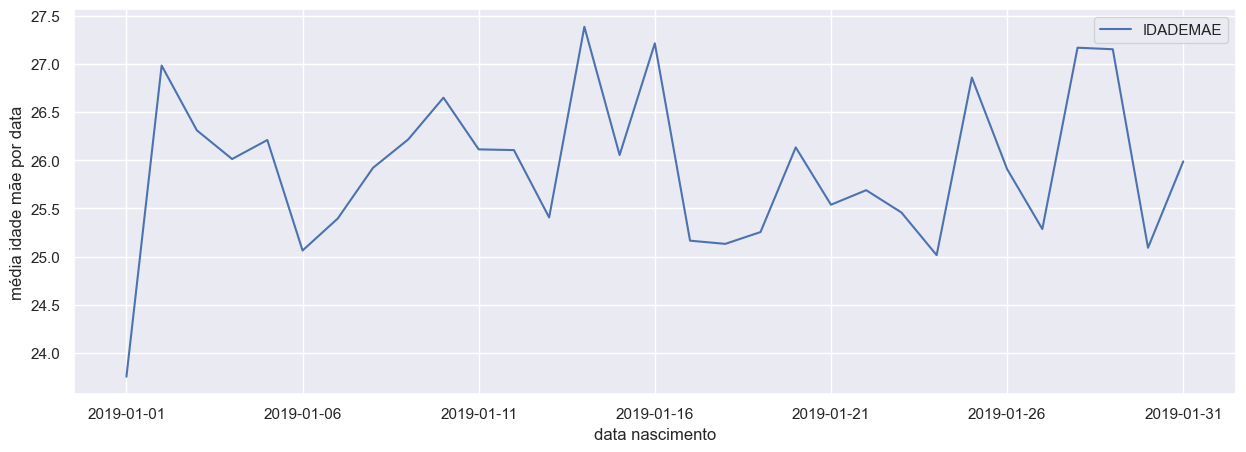

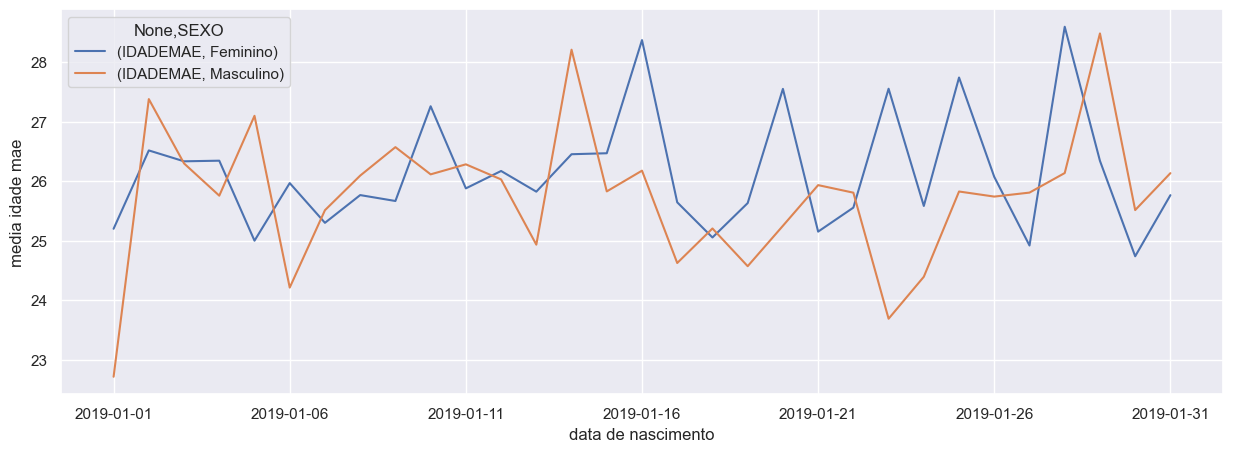

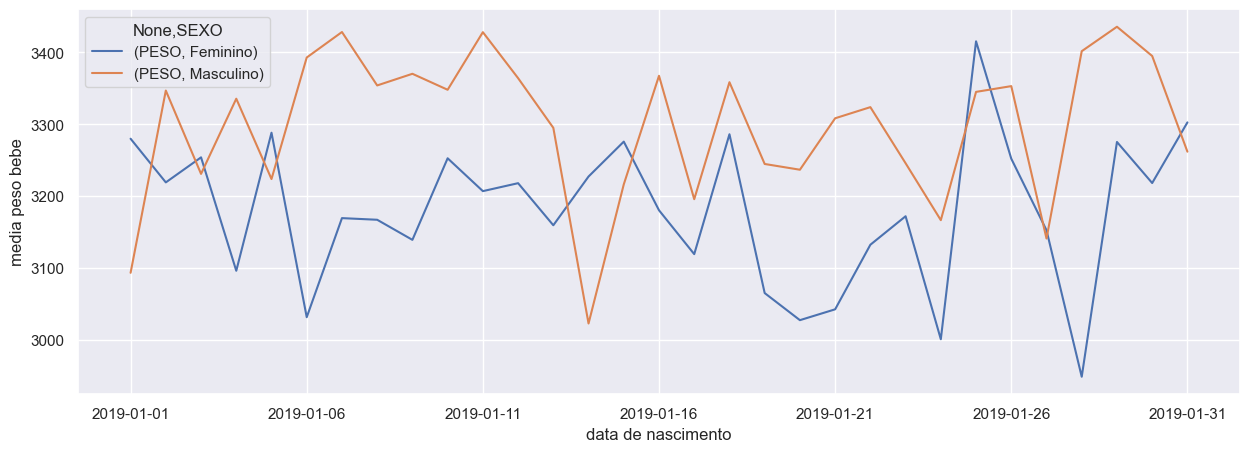

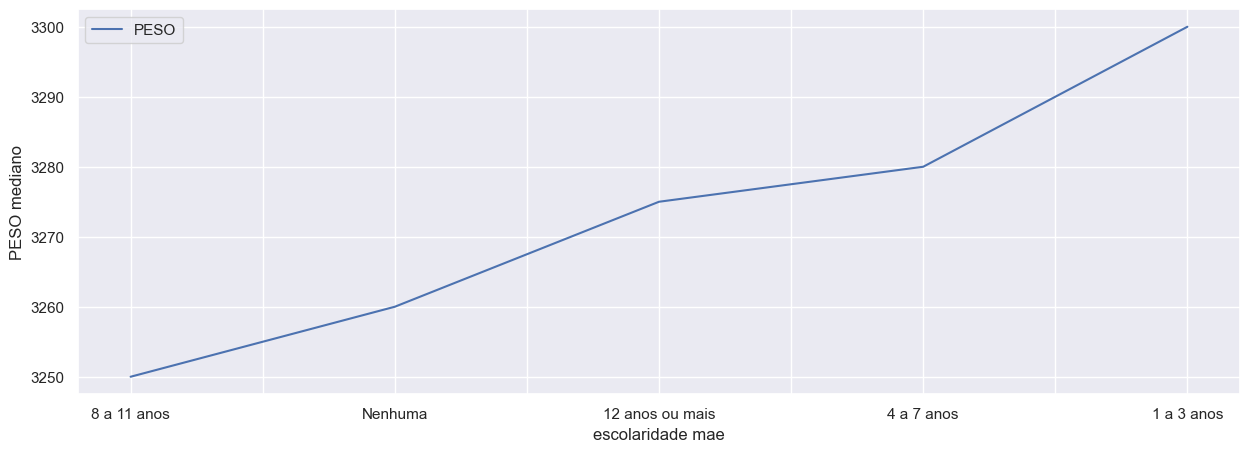

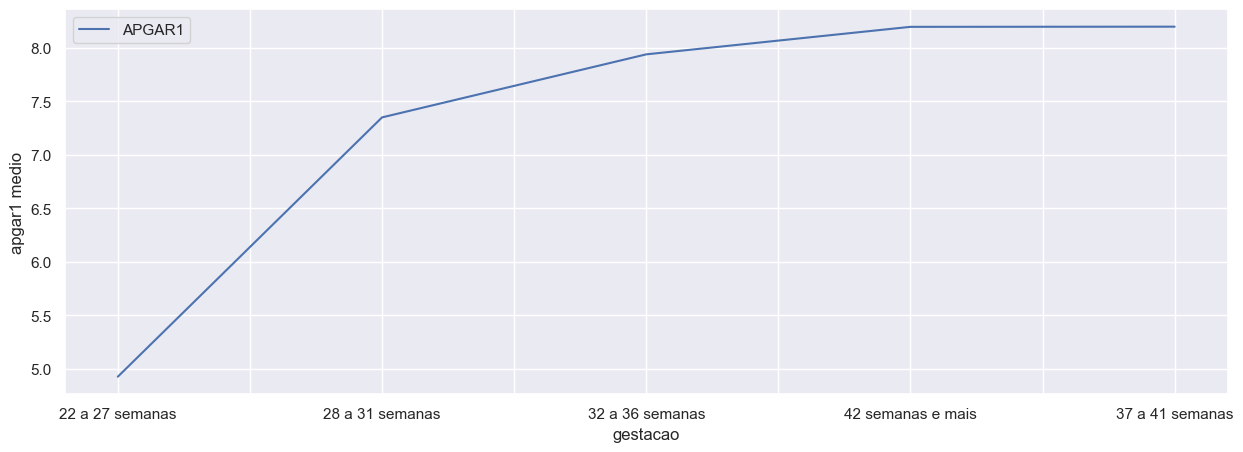

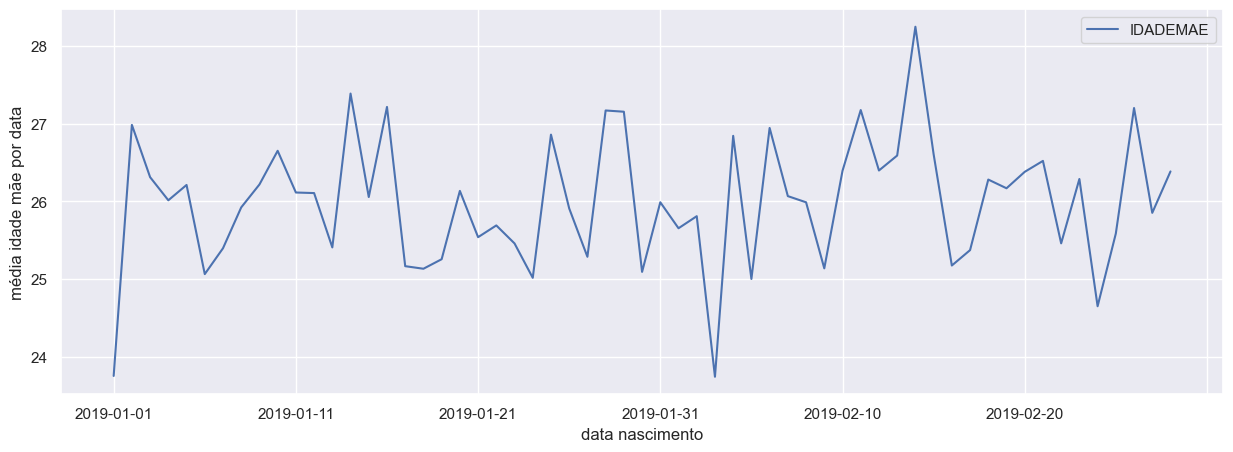

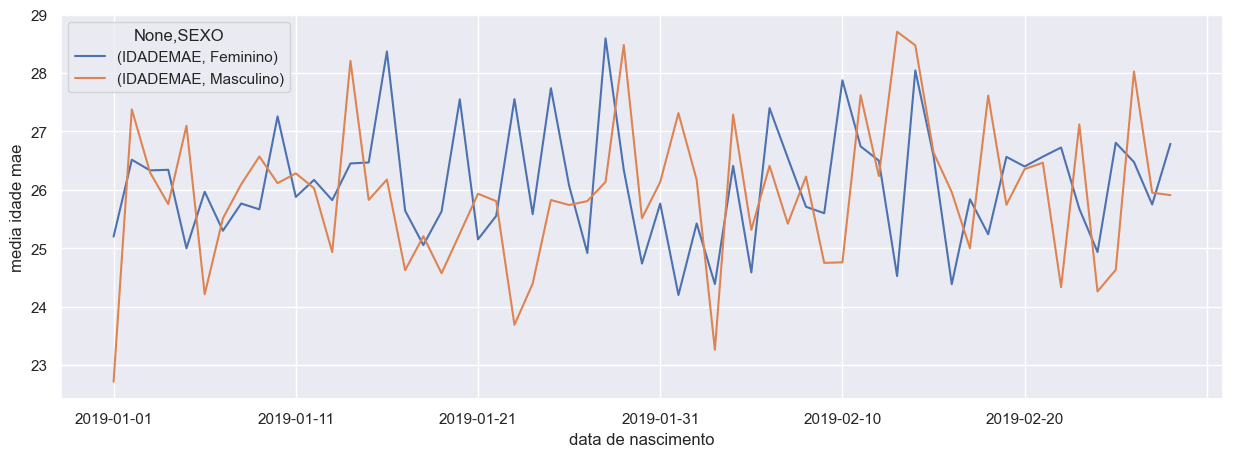

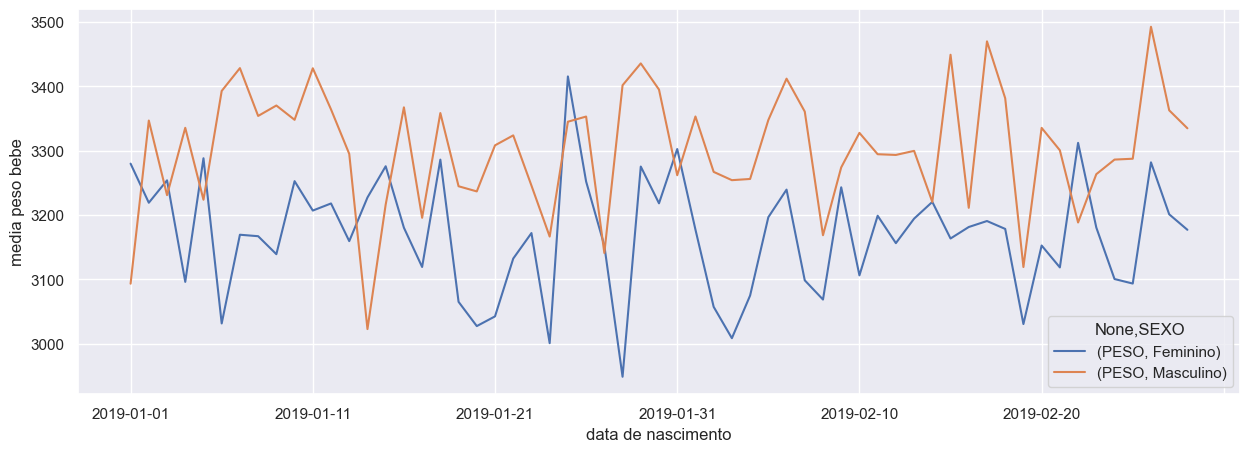

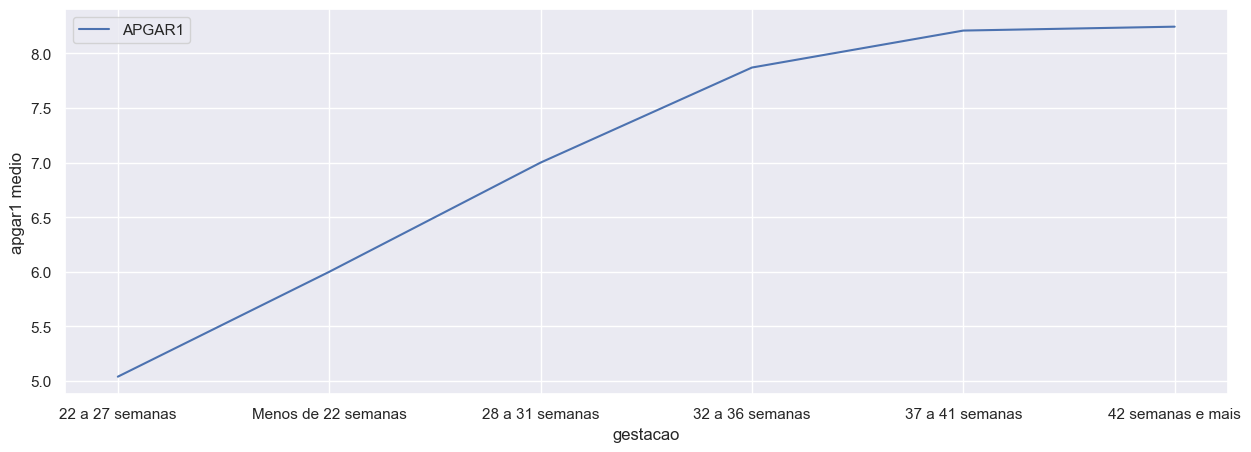

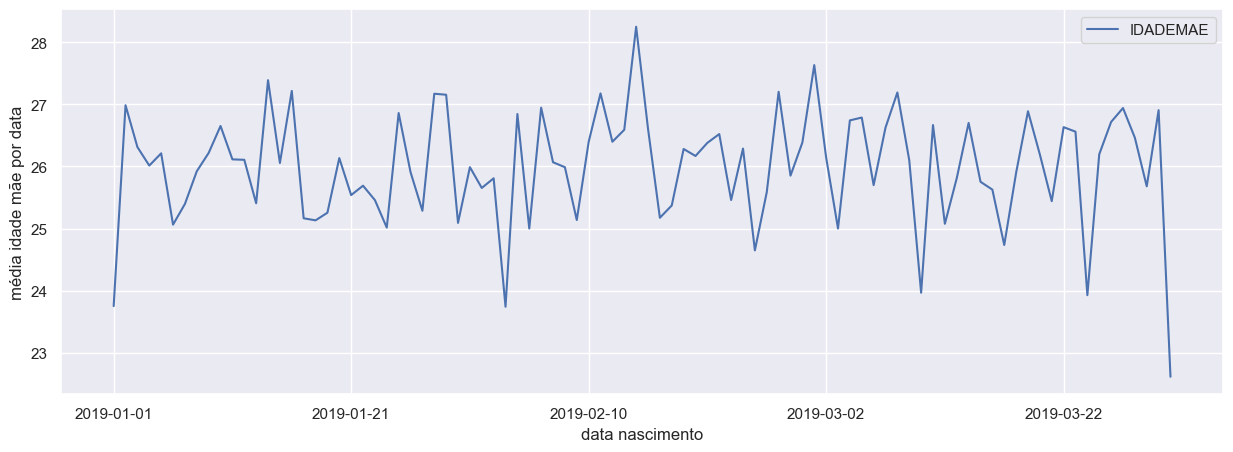

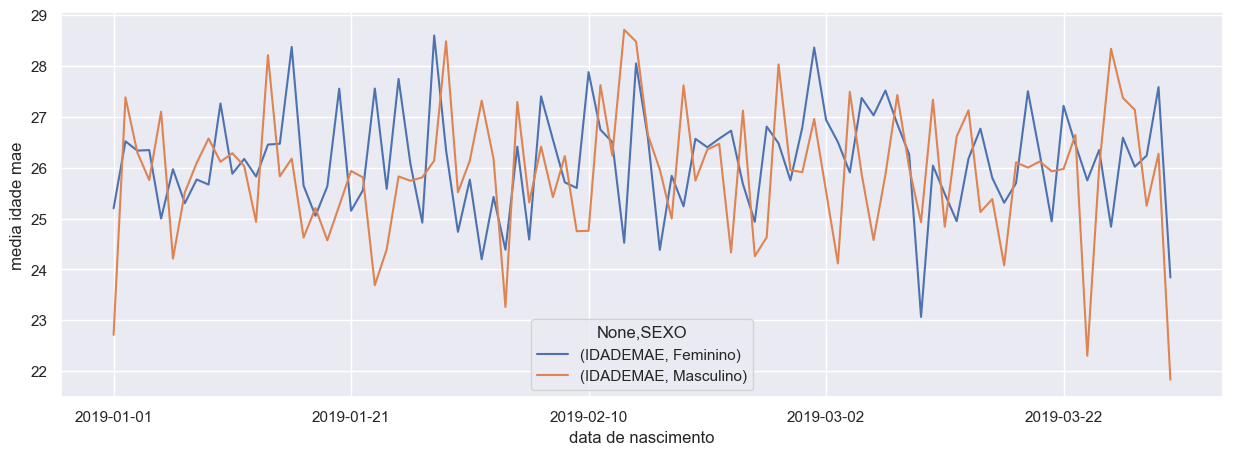

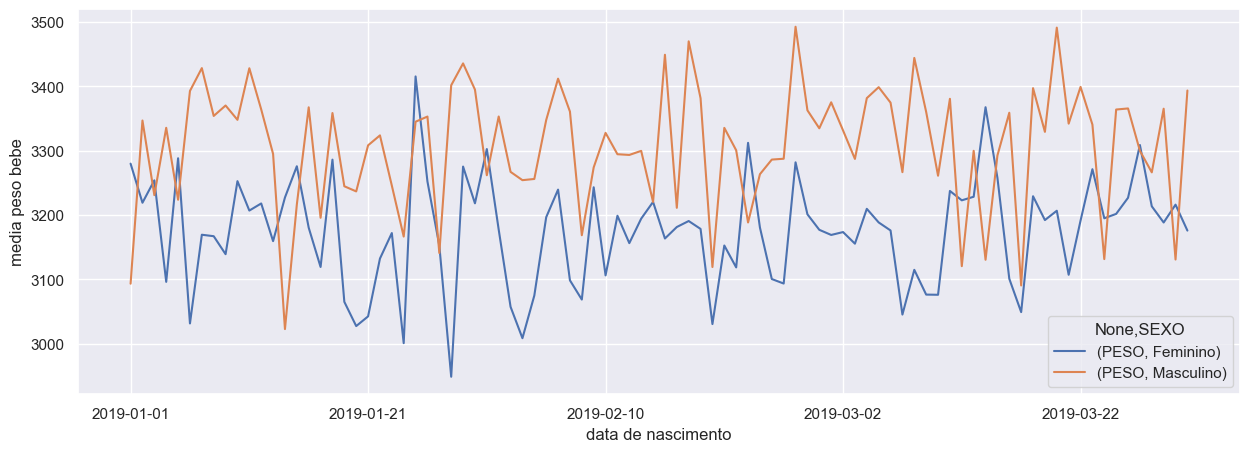

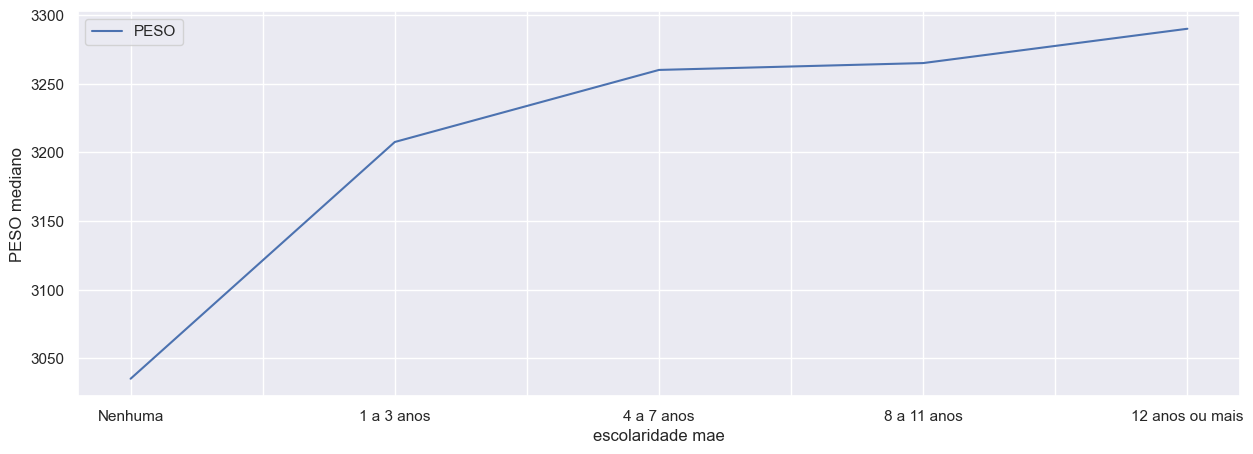

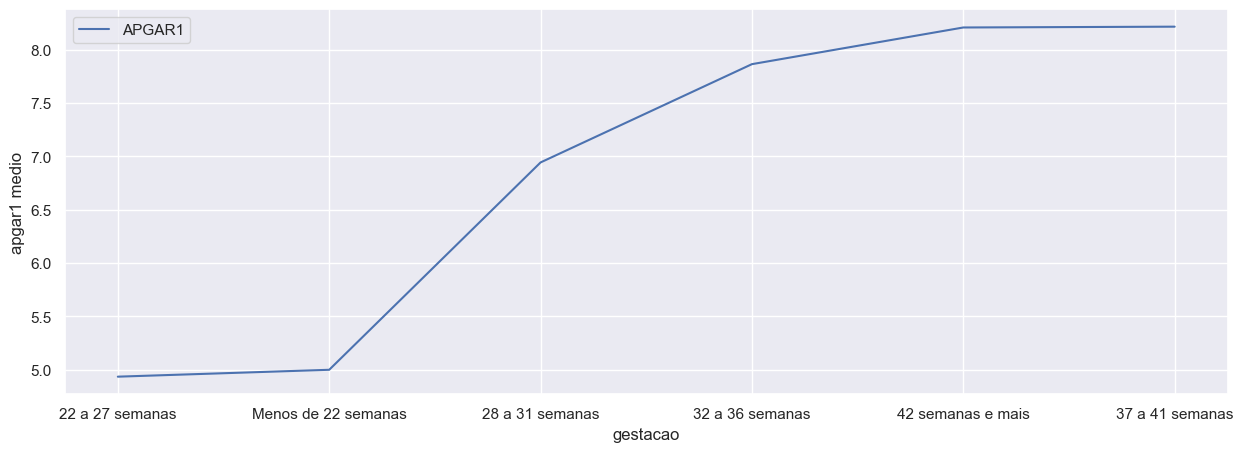

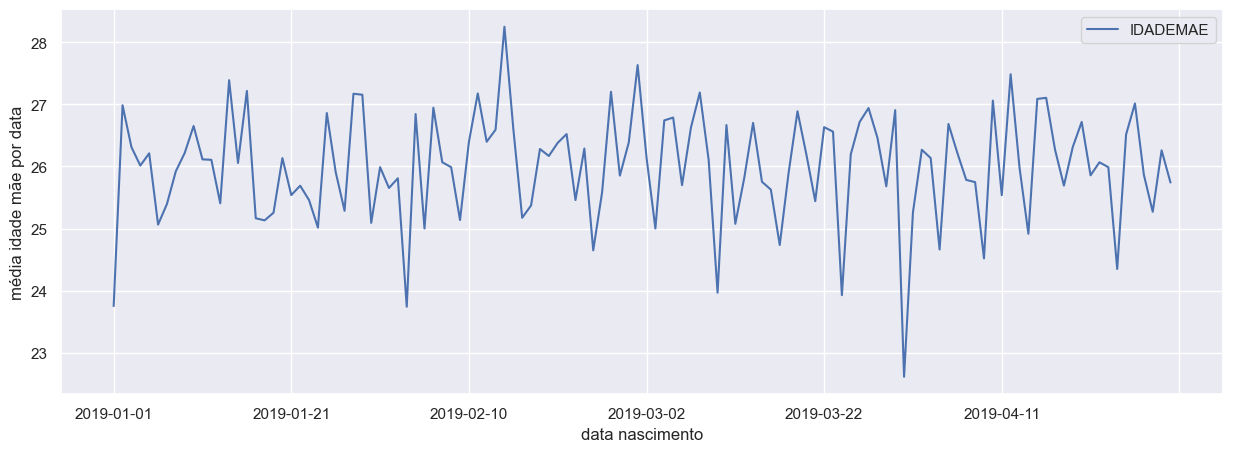

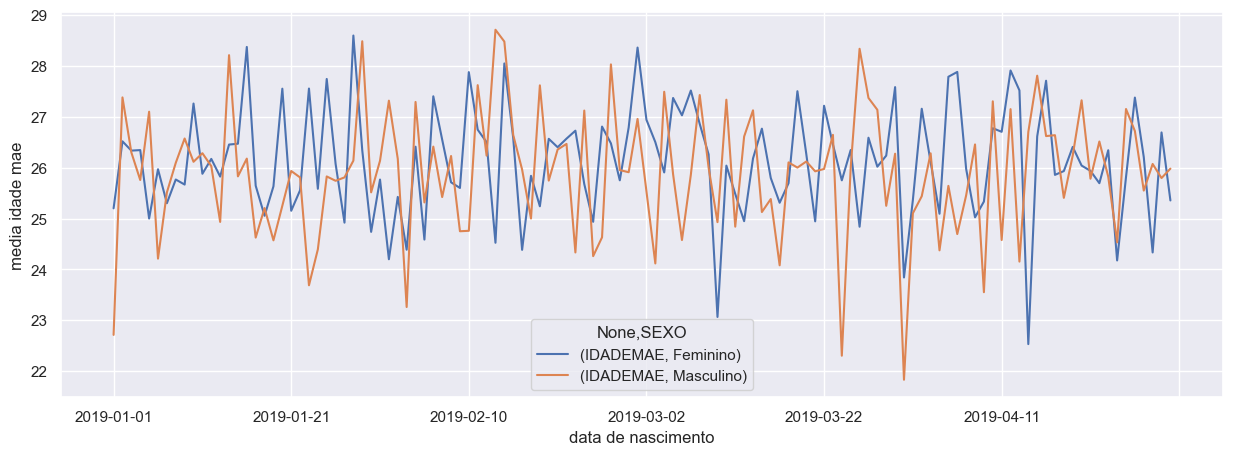

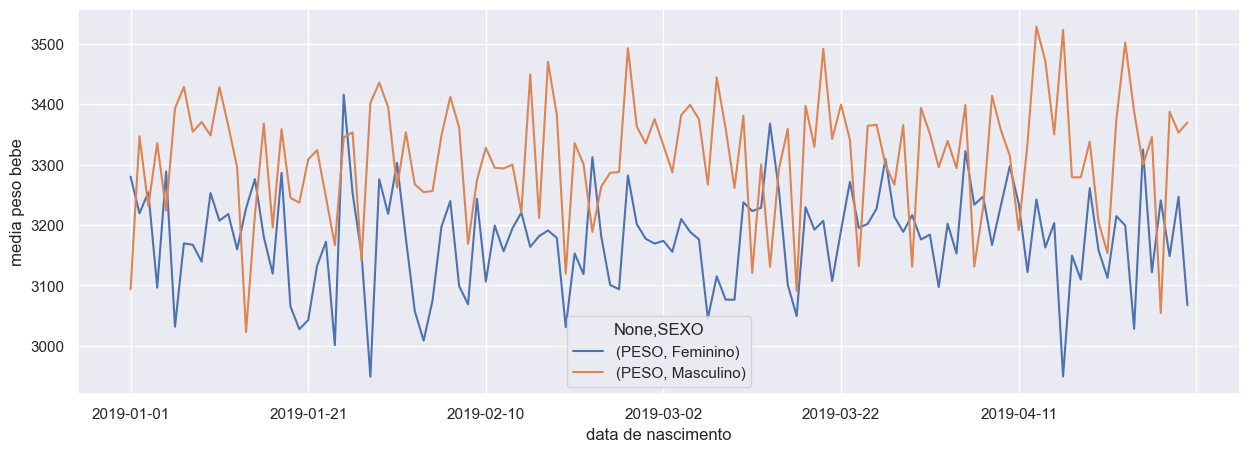

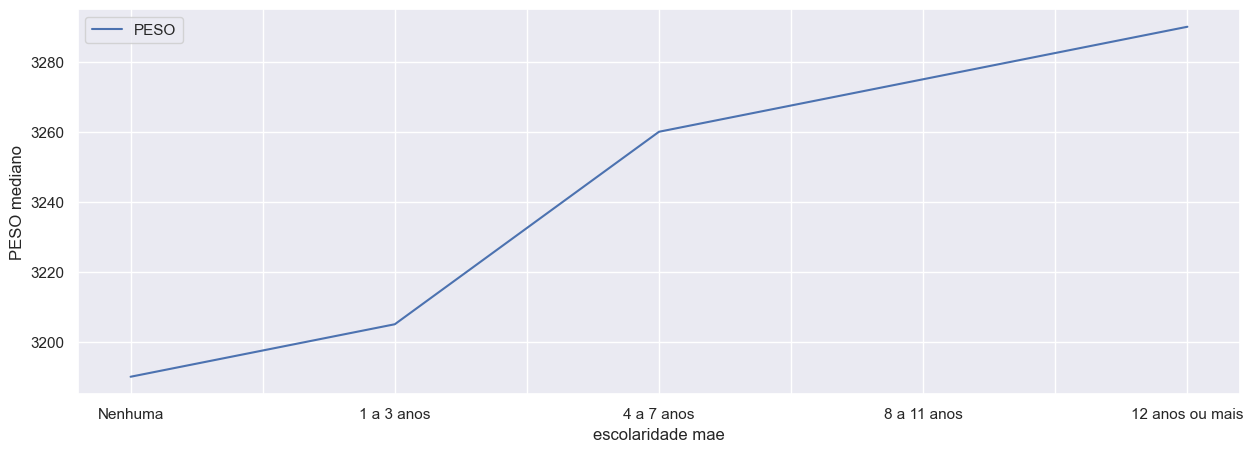

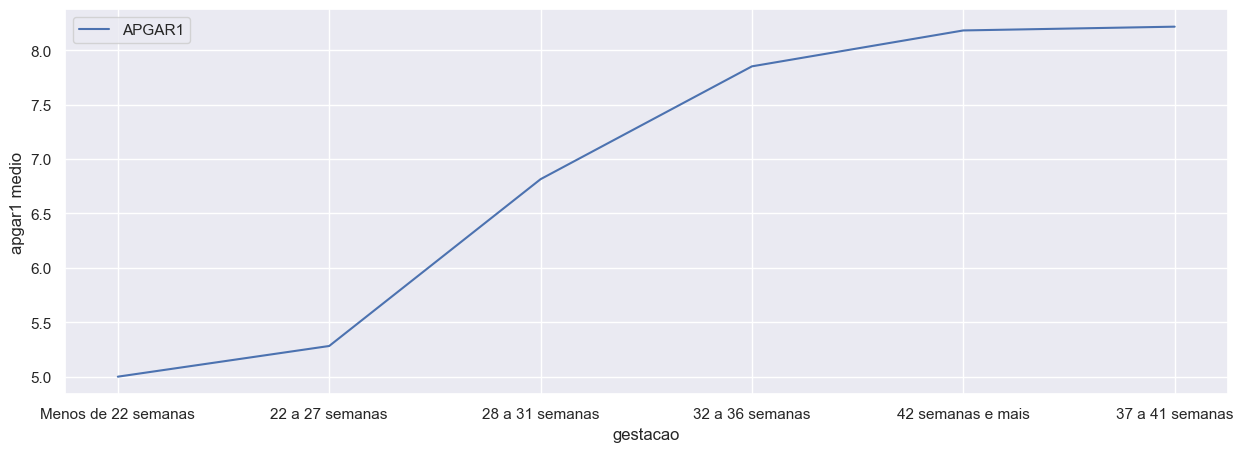

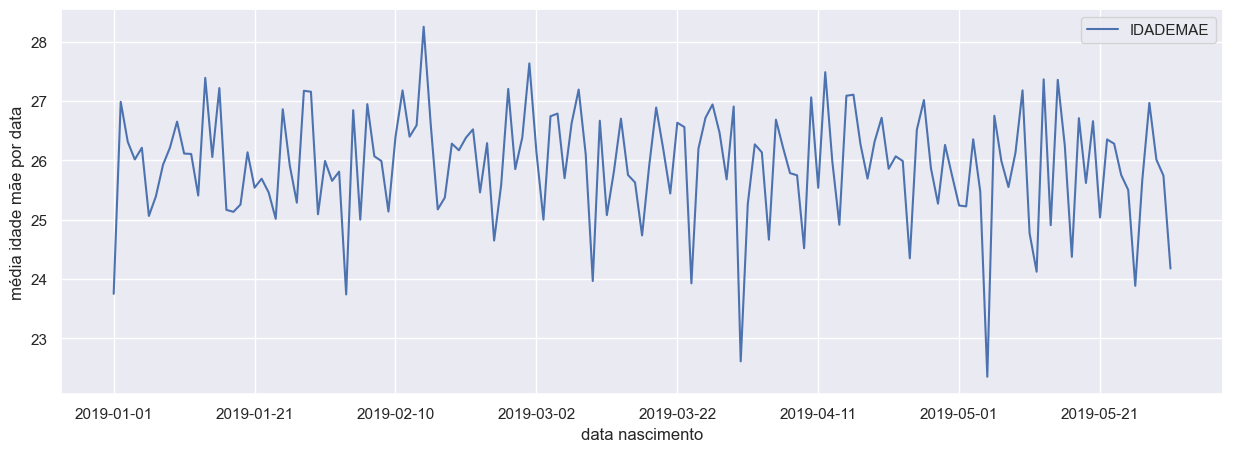

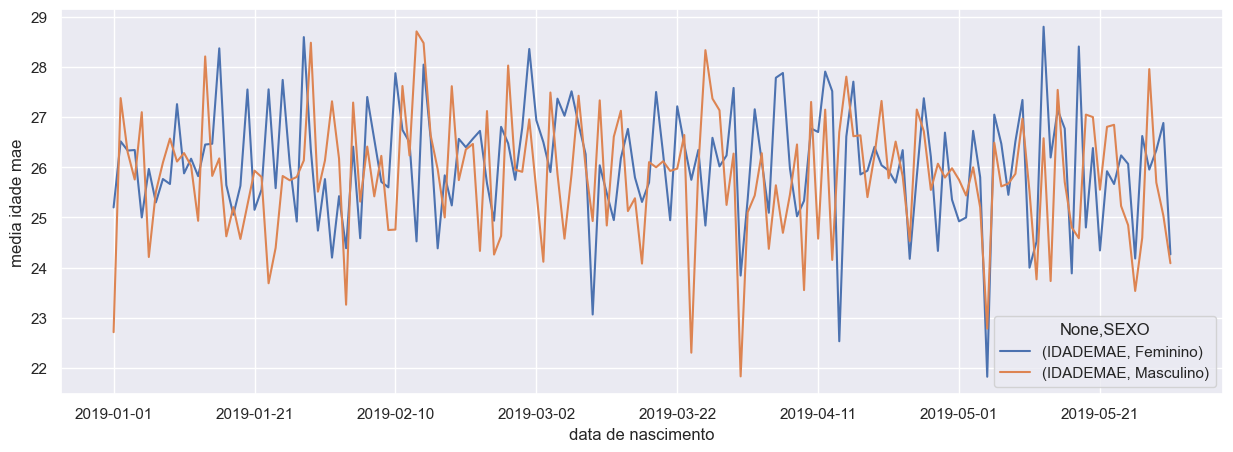

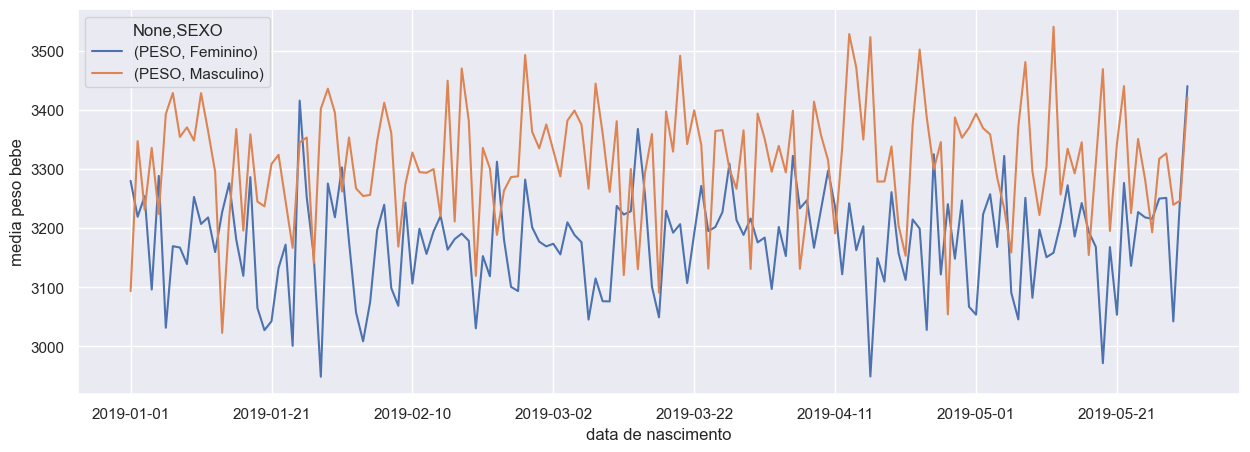

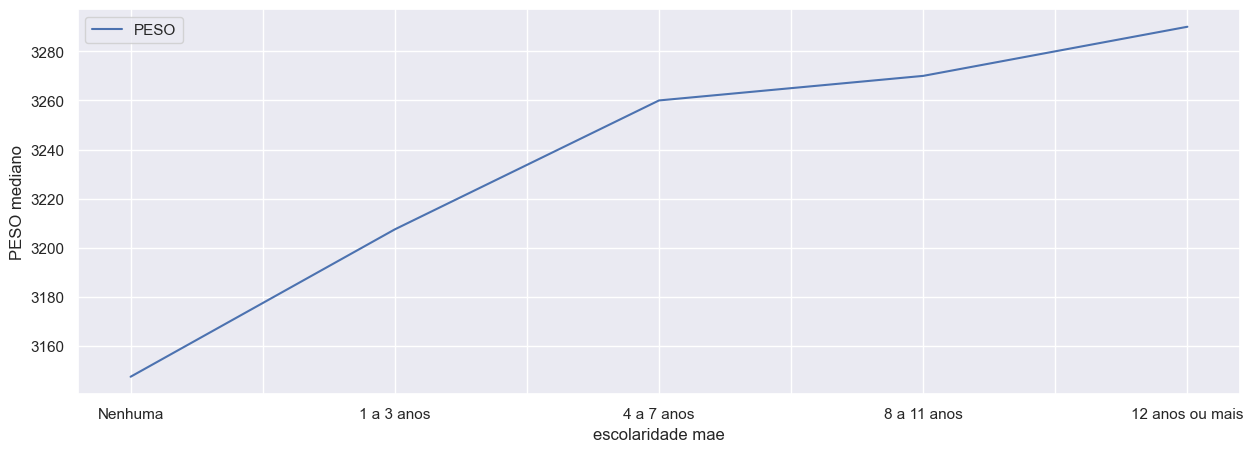

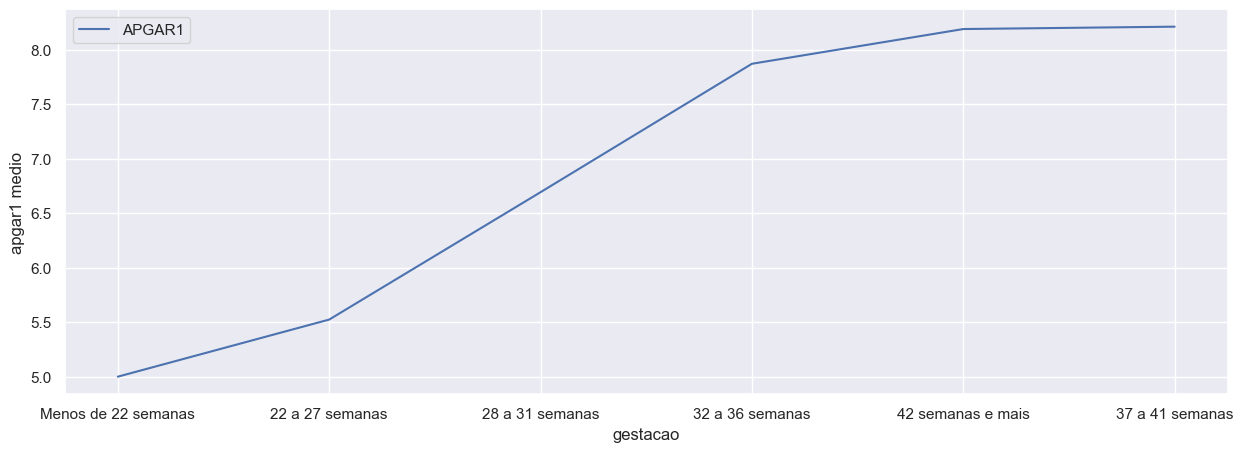

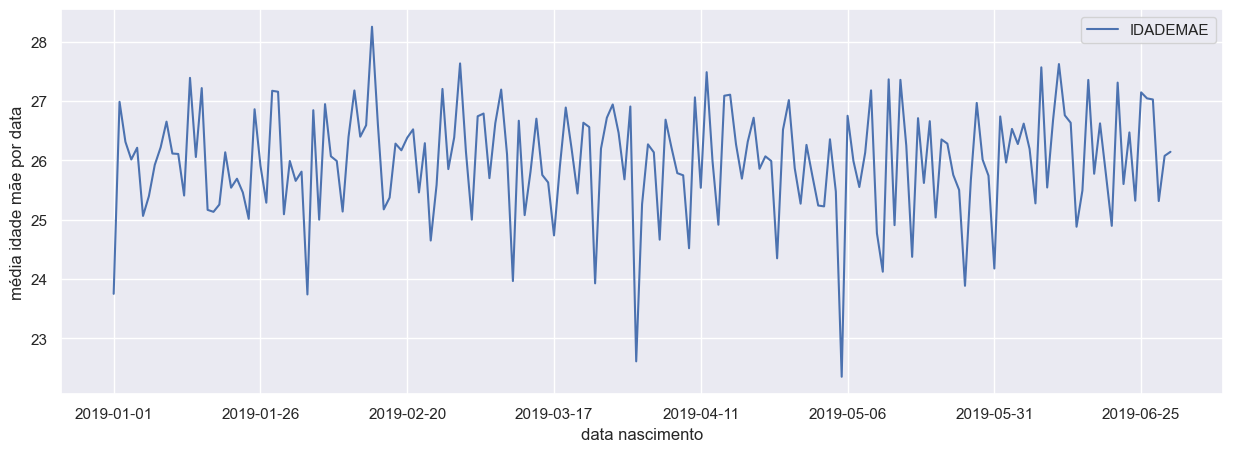

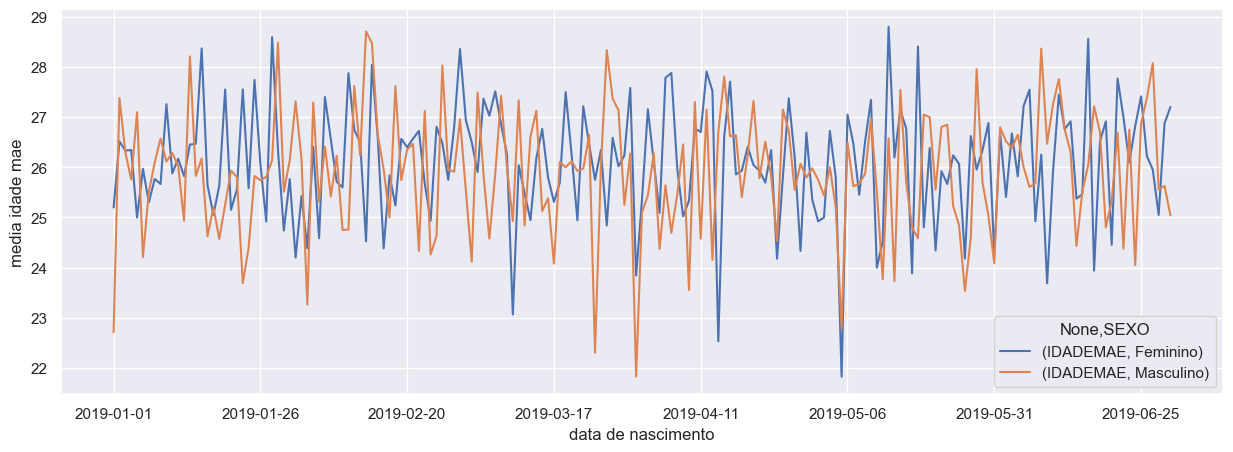

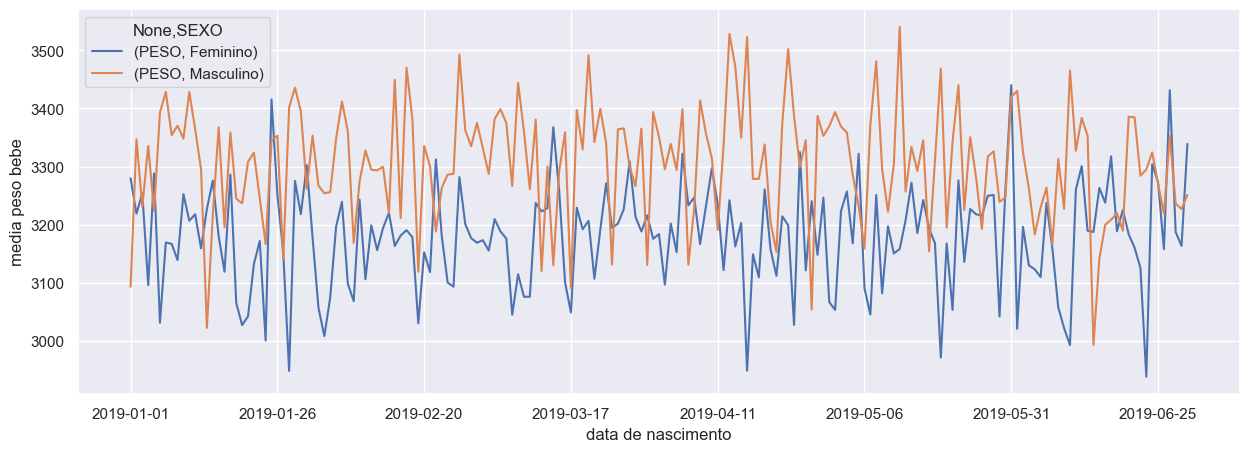

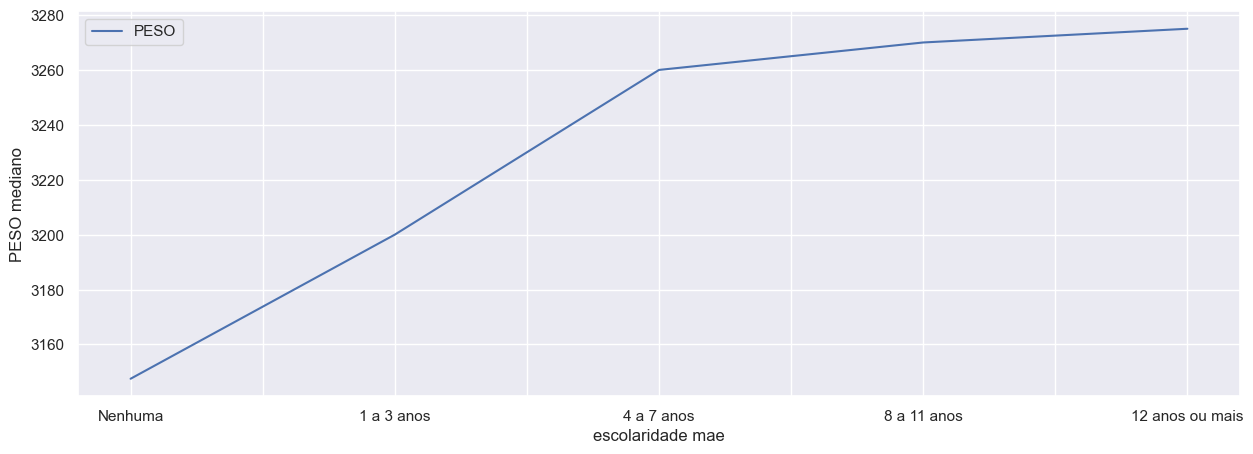

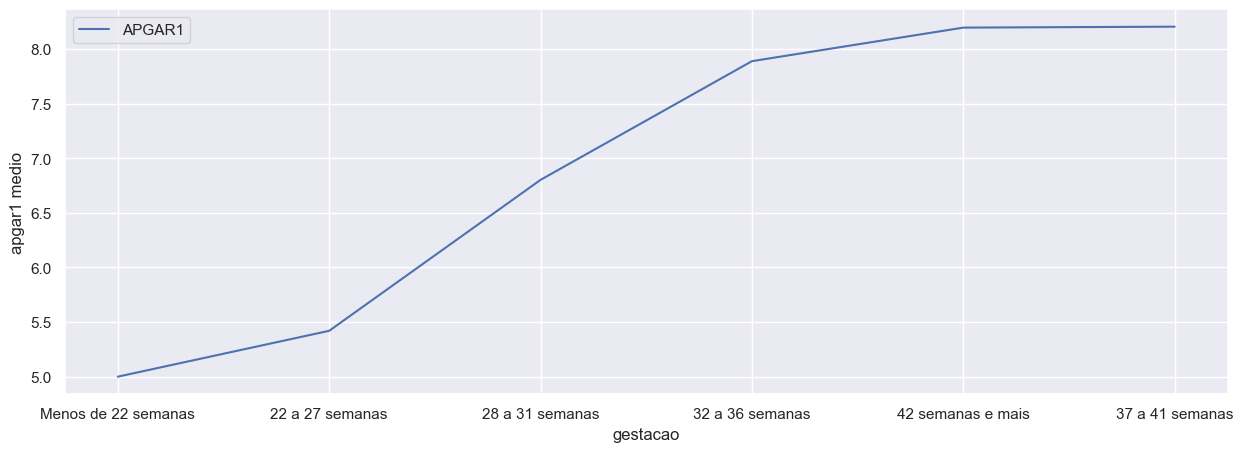

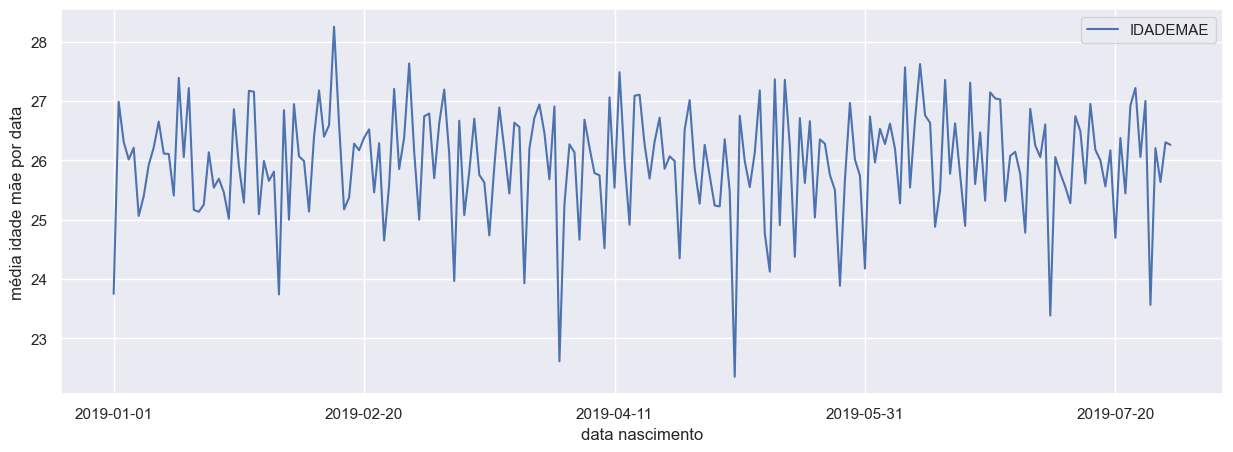

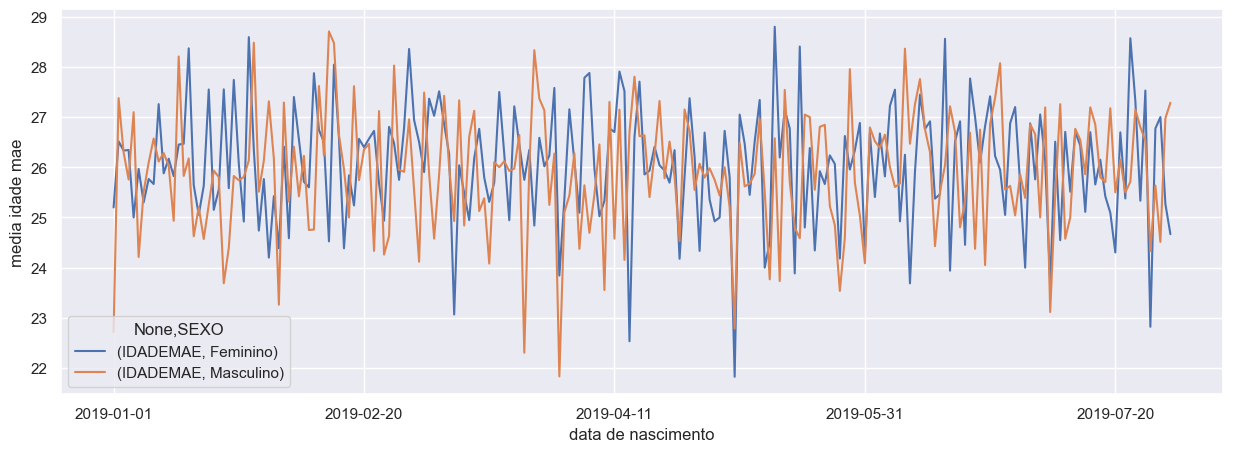

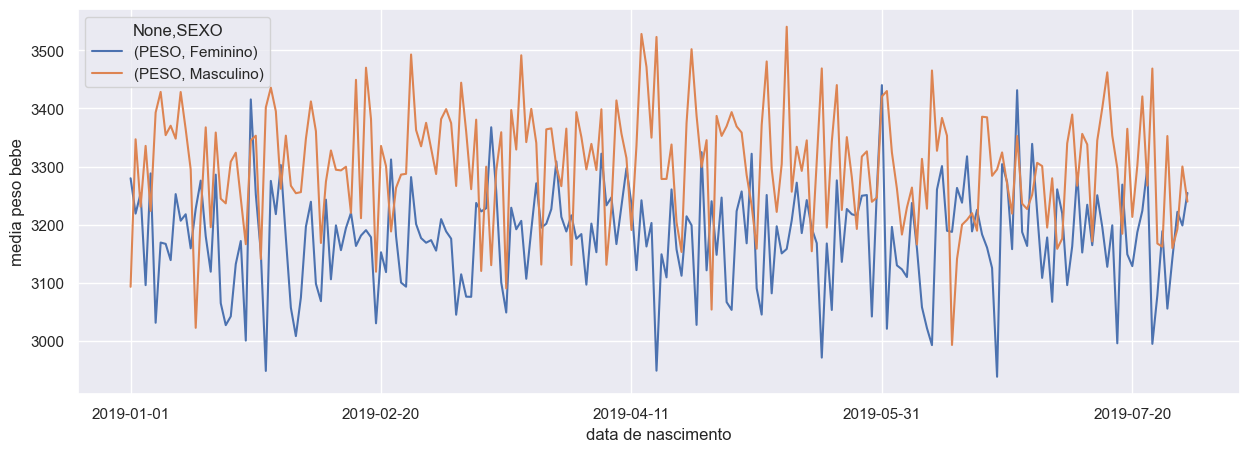

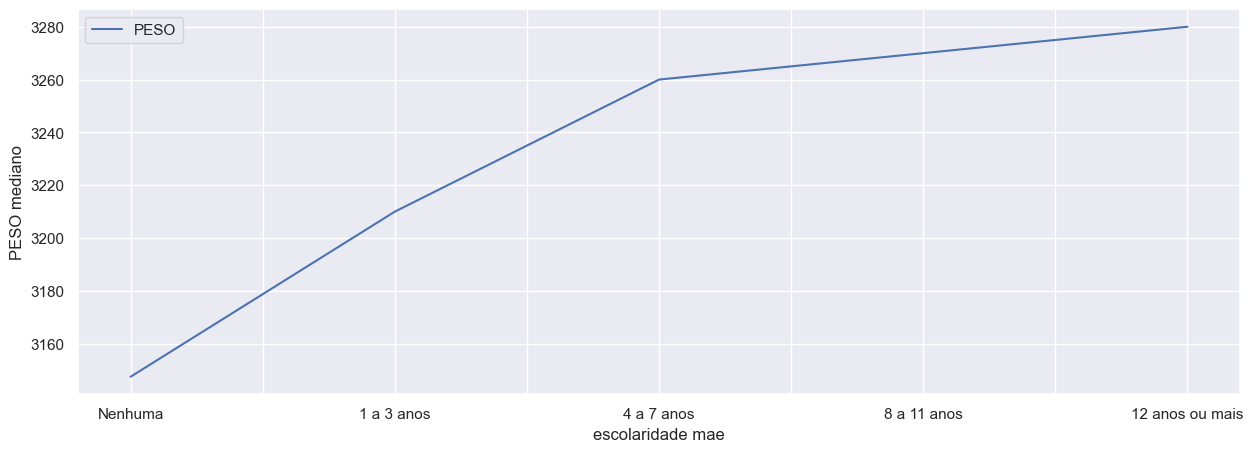

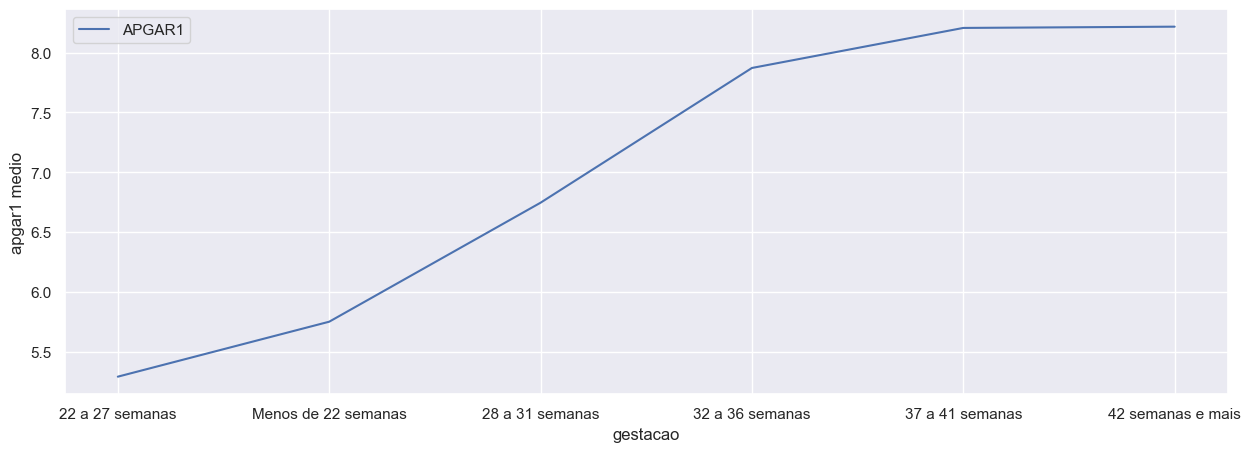

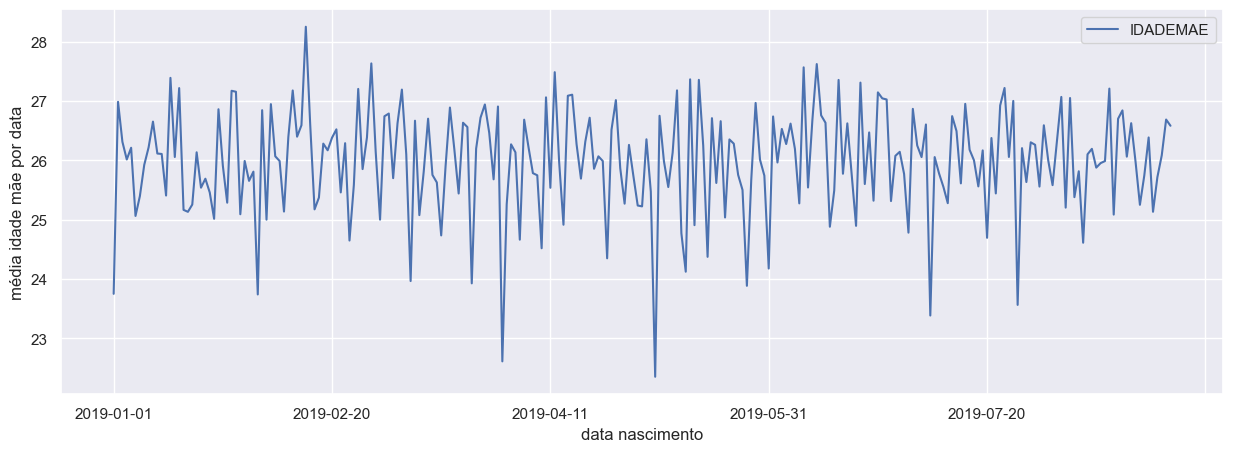

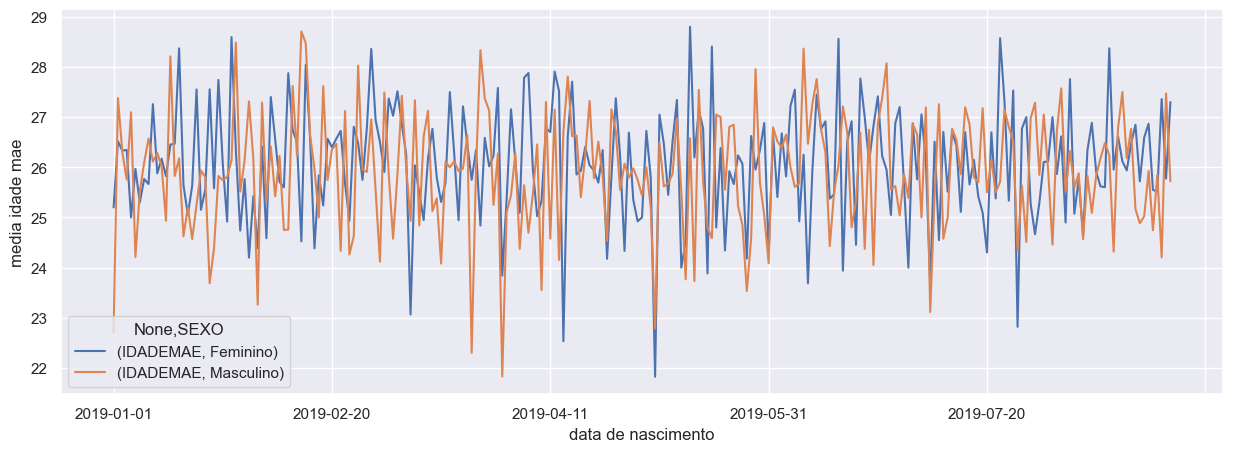

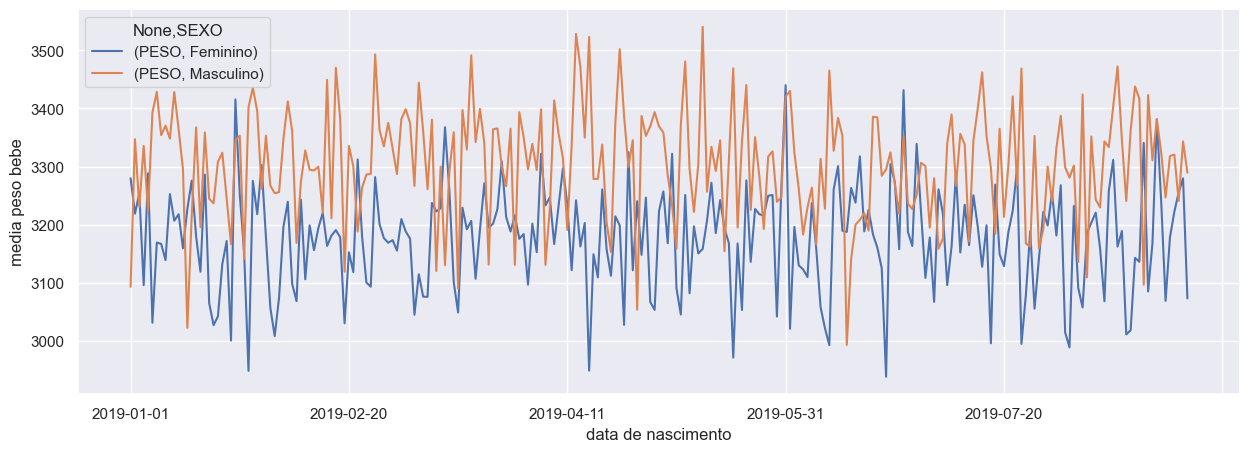

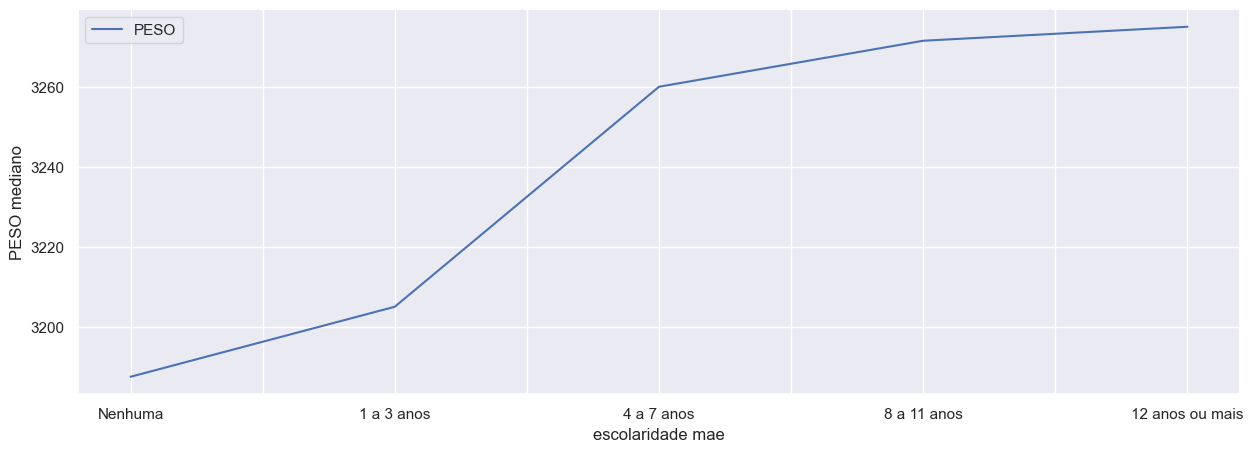

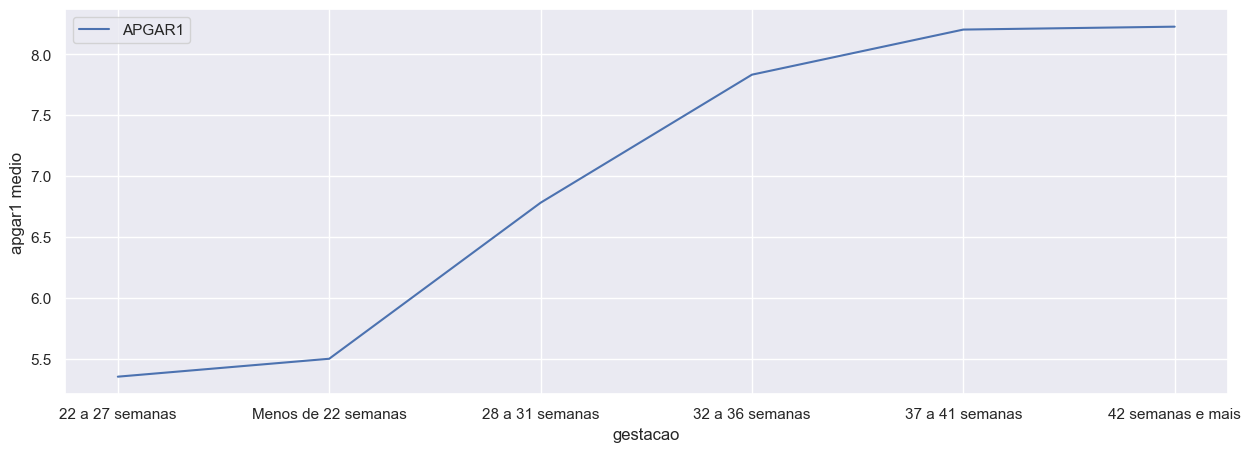

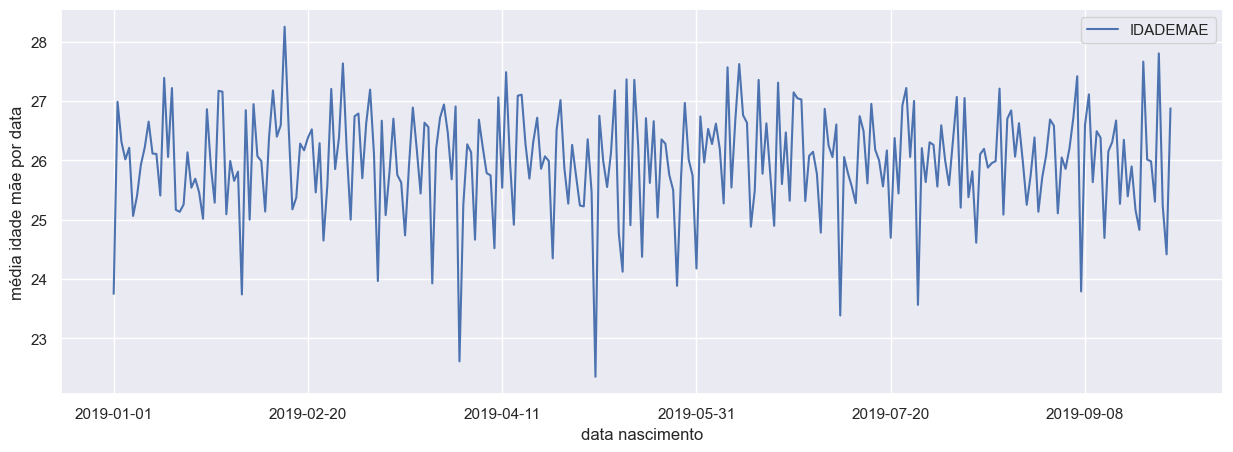

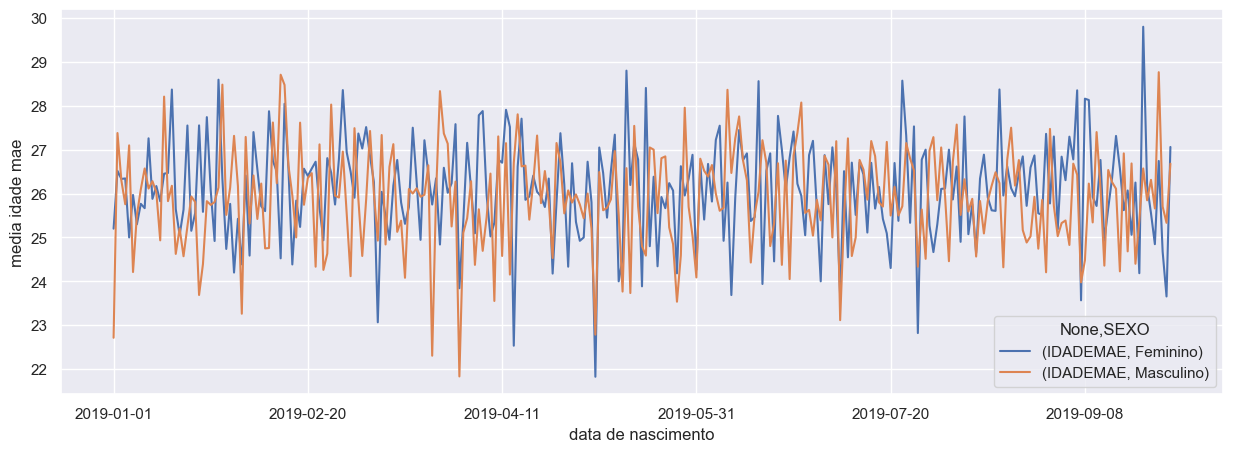

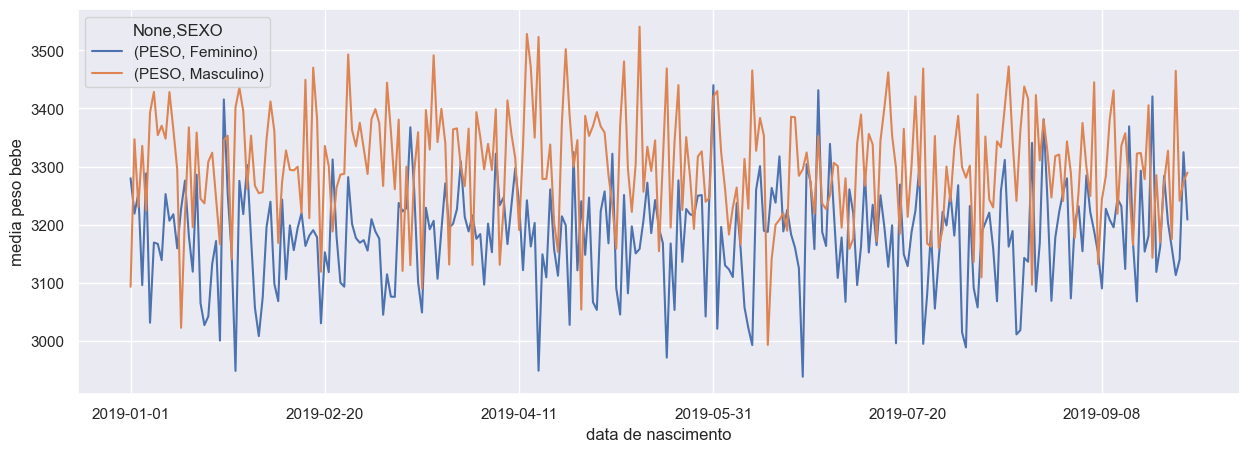

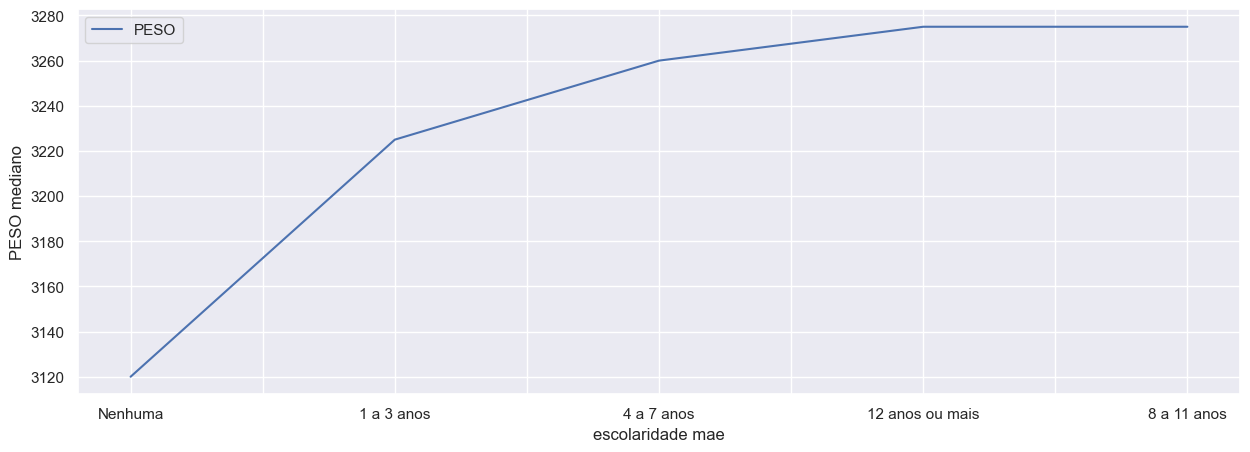

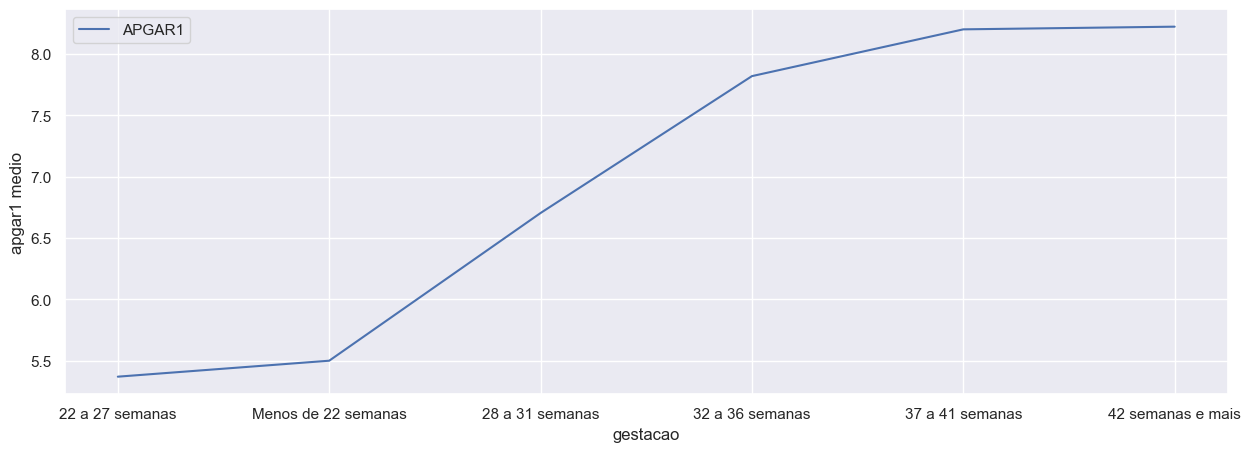

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

sns.set()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None


meses = ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN",
         "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]

# Tentativa de fazer o codigo pegar o mês anterior ao atual para pegar só mês fechado
mes_atual = datetime.datetime.now().month
meses_ate_agora = meses[:mes_atual-1]
ano = 2019

# Caminho base dos arquivos de entrada
path = r"C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\input"

# Caminho base da pasta de saída (onde salvará as imagens)
path_saida = r"C:\Users\felip\OneDrive\Ebac\Scripting\Pratica\Support_Exercise_M14\imagens"


for mes in meses_ate_agora:
    arquivo = f"SINASC_RO_{ano}_{mes}.csv"
    caminho = os.path.join(path, arquivo)
    if not os.path.exists(caminho):
        print(f"Arquivo {arquivo} não encontrado")
        continue
    
    sinasc = pd.read_csv(caminho)
    print(f"Arquivo carregado: {arquivo}")

    # Tentativa de definir o nome da pasta do mês dentro da pasta de imagens
    max_data = sinasc.DTNASC.max()[:7]
    pasta_mes = os.path.join(path_saida, max_data)
    os.makedirs(pasta_mes, exist_ok=True)
    print(f"Salvando gráficos em: {pasta_mes}")

    
    # Gera e salva os gráficos dentro da pasta do mês
    plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'mean',
                      'média idade mãe por data', 'data nascimento')
    plt.savefig(os.path.join(pasta_mes, 'media idade mae por data.png'))

    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean',
                      'media idade mae', 'data de nascimento', 'unstack')
    plt.savefig(os.path.join(pasta_mes, 'media idade mae por sexo.png'))

    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean',
                      'media peso bebe', 'data de nascimento', 'unstack')
    plt.savefig(os.path.join(pasta_mes, 'media peso bebe por sexo.png'))

    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median',
                      'PESO mediano', 'escolaridade mae', 'sort')
    plt.savefig(os.path.join(pasta_mes, 'PESO mediano por escolaridade mae.png'))

    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean',
                      'apgar1 medio', 'gestacao', 'sort')
    plt.savefig(os.path.join(pasta_mes, 'media apgar1 por gestacao.png'))

    print(f"✅ Gráficos do mês {mes} salvos com sucesso!\n")

